In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
results = pd.read_csv('data/tournament_training_results.csv')

def n_hits(game):
    f = open(f'data/game_logs/game_{game}_log.csv', 'r')
    hits = 0
    for l in f.readlines():
        for s in l.split('/'):
            if '25' in s:
                hits += 1
    return hits


In [3]:
hits = [n_hits(i) for i in range(len(results.index[:724]))]
hits_df = pd.DataFrame(hits,columns=['hits'])
hits_df['group'] = hits_df.index // n
hits_avg = hits_df.groupby('group').median()

plt.plot(range(len(hits_avg)), hits_avg)

NameError: name 'n' is not defined

In [ ]:
plt.plot(range(len(results)), results['plys'])

In [56]:
n = 10000
results = pd.read_csv('data/tournament_training_results.csv')

results2 = results.copy()
results2['group'] = results2.index // n

In [57]:
results2

,game,avg_loss,final_loss,group
0,118492,0.002393,0.081779,0
1,118493,0.004180,0.110365,0
2,118494,0.004605,0.125924,0
3,118495,0.007526,0.087129,0
4,118496,0.002234,0.018668,0
...,...,...,...,...
118487,236979,0.001806,0.079873,11
118488,236980,0.000927,0.017832,11
118489,236981,0.000689,0.016995,11
118490,236982,0.000352,0.006143,11


In [58]:
grouped_results = results2.groupby('group').mean()

In [59]:
grouped_results

,game,avg_loss,final_loss
group,,,
0,123491.5,0.002805,0.064770
1,133491.5,0.002803,0.066247
2,143491.5,0.002805,0.064837
3,153491.5,0.002781,0.064341
4,163491.5,0.002891,0.064610
5,173491.5,0.002813,0.065107
6,183491.5,0.002787,0.064868
7,193491.5,0.002809,0.065833
8,203491.5,0.002789,0.064143


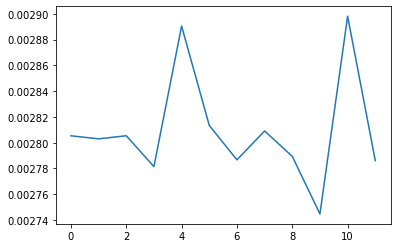

In [60]:
plt.plot(range(len(grouped_results)), grouped_results['avg_loss'])

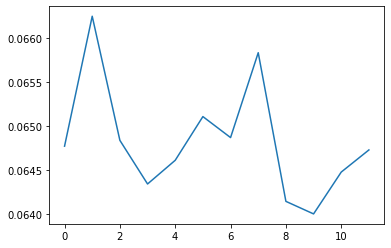

In [61]:
plt.plot(range(len(grouped_results)), grouped_results['final_loss'])